# Chapter 6 - Exercise 1
### Author: *John Benedick Estrada*
---
**Exercise:** Start GoL in a random state and run it until it stabilizes. What stable patterns can you identify?

##### My implementation of Conway's Game of Life

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output
from utils import underride

from scipy.signal import correlate2d

### Code obtained from the book and the provided Jupyter notebook

In [2]:
""" Code example from Complexity and Computation, a book about
exploring complexity science with Python.  Available free from

http://greenteapress.com/complexity

Copyright 2016 Allen Downey
MIT License: http://opensource.org/licenses/MIT
"""


class Cell2D:
    """Parent class for 2-D cellular automata."""

    def __init__(self, n, m=None):
        """Initializes the attributes.

        n: number of rows
        m: number of columns
        """
        m = n if m is None else m
        self.array = np.zeros((n, m), np.uint8)

    def add_cells(self, row, col, *strings):
        """Adds cells at the given location.

        row: top row index
        col: left col index
        strings: list of strings of 0s and 1s
        """
        for i, s in enumerate(strings):
            self.array[row+i, col:col+len(s)] = np.array([int(b) for b in s])

    def loop(self, iters=1):
        """Runs the given number of steps."""
        for i in range(iters):
            self.step()

    def draw(self, **options):
        """Draws the array.
        """
        draw_array(self.array, **options)

    def animate(self, frames, interval=None, step=None):
        """Animate the automaton.
        
        frames: number of frames to draw
        interval: time between frames in seconds
        iters: number of steps between frames
        """
        if step is None:
            step = self.step
            
        plt.figure()
        try:
            for i in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                step()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass
        

def draw_array(array, **options):
    """Draws the cells."""
    n, m = array.shape
    options = underride(options,
                        cmap='Greens',
                        alpha=0.7,
                        vmin=0, vmax=1, 
                        interpolation='none', 
                        origin='upper',
                        extent=[0, m, 0, n])

    plt.axis([0, m, 0, n])
    plt.xticks([])
    plt.yticks([])

    return plt.imshow(array, **options)

In [3]:
class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

In [4]:
def make_life(n, m, row, col, *strings):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life

### Random State

In [5]:
def make_rand_state_life(n, m):
    # Generate a list of random bit string.
    init_state = ["".join(["0" if np.random.random() > 0.5 else "1" for _ in range(m)]) for _ in range(n)]

    return make_life(n, m, 0, 0, *init_state)

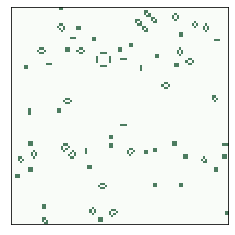

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_rand_state_life(100, 100)
life.draw()

life.animate(1000)